### Importing the neccessary Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import math

import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')

import seaborn as sns

NOte : Execute below cells only if running on google colab for getting the dataset

In [ ]:
!gdown --id 129tJELVDISk8LYUklFBXR9HU2nGiUGkn --output wish-website-summer-products-with-rating-and-performance_2020-08.csv
!gdown --id 1SuPa3zvm24oTzbqQkhVdNirCkIHFKJI2 --output unique-categories.sorted-by-count.csv
!gdown --id 1LdihIxp-RZWaE-Nd5mhTGDsplE06iI1w --output unique-categories.csv

Downloading...
From: https://drive.google.com/uc?id=129tJELVDISk8LYUklFBXR9HU2nGiUGkn
To: /content/wish-website-summer-products-with-rating-and-performance_2020-08.csv
100% 1.23M/1.23M [00:00<00:00, 78.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SuPa3zvm24oTzbqQkhVdNirCkIHFKJI2
To: /content/unique-categories.sorted-by-count.csv
100% 39.4k/39.4k [00:00<00:00, 54.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LdihIxp-RZWaE-Nd5mhTGDsplE06iI1w
To: /content/unique-categories.csv
100% 33.8k/33.8k [00:00<00:00, 26.4MB/s]


### import the dataset 

In [ ]:
df = pd.read_csv('wish-website-summer-products-with-rating-and-performance_2020-08.csv')
df.head(3)

,title_in_french,title_translated,listed_price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


#### Let's start with having a look at the sorted `.csv` file

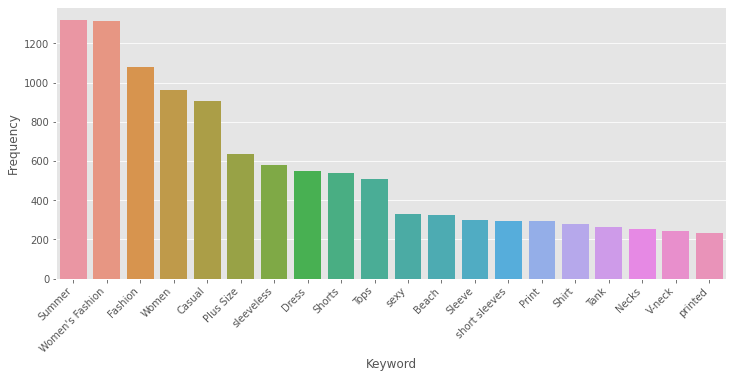

In [ ]:
df2 = pd.read_csv('unique-categories.sorted-by-count.csv')

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = 'keyword', y = 'count', data = df2[:20], ax = ax)

ax.set(xlabel='Keyword', ylabel='Frequency')
plt.xticks(rotation=45, ha='right')

plt.show()

Looking at this, it isn't surprising that 'Summer' is the most-occuring tag for this dataset. However, further analysis shows that fashion keywords make up a majority of tags. Specifically, there are more female-oriented products ('women', 'dress', 'sexy',) than neutral/male-oriented products ('shorts', 'top', 'shirt').

In [ ]:
df.shape

(1573, 43)

In [ ]:
df.columns

Index(['title_in_french', 'title_translated', 'listed_price', 'retail_price',
       'currency_buyer', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

Let's determine what each parameter is for:

0.   `title_in_french` - The title of the product in the language that the site is set to (French).
1.   `title_translated` - The title of the product in English.
2.   `listed_price` - The price that the product sells for on Wish.
3.   `retail price` - The reference price that the product sells for on other sites.
4.   `currency_buyer` - The currency that the product is purchased in; EUR.
5.   `units_sold` - Lower bound approximation of the units sold of the product.
6.   `uses_ad_boost` - Denotes whether the product used ad boost or not (1 or 0).
7.   `rating` - The mean rating of the product.
8.   `rating_count` - The number of ratings of the product.
9.   `rating_five_count` - The number of five-star ratings of the product.
10.  `rating_four_count` - The number of four-star ratings of the product.
11.  `rating_three_count` - The number of three-star ratings of the product.
12.  `rating_two_count` - The number of two-star ratings of the product.
13.  `rating_one_count` - The number of one-star ratings of the product.
14.  `badges_count` - Number of badges the product has on its page.
15.  `badge_local_product` - Signifies that the product was manufactured locally.
16.  `badge_product_quality` - Signifies that a majority of buyers are satisfied with the product.
17.  `badge_fast_shipping` - Signifies that the product is eligible for fast shipping.
18.  `tags` - Product tags set by the seller.
19.  `product_color` - Color of the product.
20.  `product_variation_size_id` - Size of the product (if applicable).
21.  `product_variation_inventory` - The amount of product availble for purchase at once; maximum is fifty.
22.  `shipping_option_name` - The type of shipping for the product.
23.  `shipping_option_price` - The price of shipping the product.
24.  `shipping_is_express` - Denotes whether the product has the option of express shipping or not (1 or 0).
25.  `countries_shipped_to` - The number of countries the product has been shipped to.
26.  `inventory_total` - The total inventory of a product; seems to possess a maximum of fifty.
27.  `has_urgency_banner` - Denotes whether the product had an emergency banner or not (1 or 0).
28.  `urgency_text` - The text of the emergency banner (if applicable).
29.  `origin_country` - The country the product was manufactured in.
30.  `merchant_title` - The public name of the merchant.
31.  `merchant_name` - The private name of the merchant.
32.  `merchant_info_subtitle` - The attributes of the merchant (positive rating and votes).
33.  `merchant_rating_count` - The number of ratings of the merchant.
34.  `merchant_rating` - The mean rating of the merchant.
35.  `merchant_id` - The unique ID of the merchant.
36.  `merchant_has_profile_picture` - Denotes whether the merchant has a profile picture or not (1 or 0).
37.  `merchant_profile_picture` - The URL to the merchant's profile picture (if applicable).
38.  `product_url` - The Wish URL of the product.
39.  `product_picture` - The URL of the product picture.
40.  `product_id` - The unique ID of the product.
41.  `theme` - The 'theme' of the product; summer.
42.  `crawl_month` - The month that the information was scraped; 08-2020.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_in_french               1573 non-null   object 
 1   title_translated              1573 non-null   object 
 2   listed_price                  1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
listed_price,1573.0,8.325372,3.932030,1.000000,5.810000,8.00000,11.000000,49.0
retail_price,1573.0,23.288620,30.357863,1.000000,7.000000,10.00000,26.000000,252.0
units_sold,1573.0,4339.005086,9356.539302,1.000000,100.000000,1000.00000,5000.000000,100000.0
uses_ad_boosts,1573.0,0.432931,0.495639,0.000000,0.000000,0.00000,1.000000,1.0
rating,1573.0,3.820896,0.515374,1.000000,3.550000,3.85000,4.110000,5.0
rating_count,1573.0,889.659250,1983.928834,0.000000,24.000000,150.00000,855.000000,20744.0
rating_five_count,1528.0,442.263743,980.203270,0.000000,12.000000,79.00000,413.500000,11548.0
rating_four_count,1528.0,179.599476,400.516231,0.000000,5.000000,31.50000,168.250000,4152.0
rating_three_count,1528.0,134.549738,311.690656,0.000000,4.000000,24.00000,129.250000,3658.0
rating_two_count,1528.0,63.711387,151.343933,0.000000,2.000000,11.00000,62.000000,2003.0


## Data Cleaning

### Check for any null values

In [ ]:
df.isnull().sum()[df.isnull().sum() !=0]

rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

### Plot of missing data

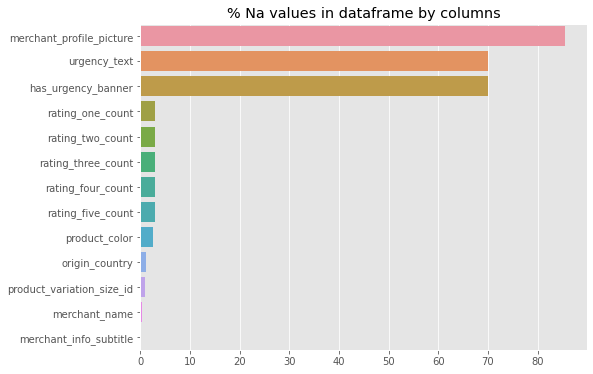

In [ ]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');
    
plot_missing_data(df)

**Lets take a look at the columns with more than 50% null values and check whether they are useful or not**

In [ ]:
# Merchant Profile Picture

df['merchant_profile_picture'].value_counts()

https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5acaf29d5ebcfd72403106a8.jpg    12
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5533c83986ff95173dc017d0.jpg     8
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_58ad449708de0c6dc59d9e06.jpg     6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55c8a4c33a698c6010edcd9e.jpg     6
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg     5
                                                                                                       ..
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_582bd2fde18c0f0a402ba101.jpg     1
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_54869cf344a28275e008fb00.jpg     1
https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_56f0f2bdc3c3715871ade946.jpg     1
https://s3-us-west-1.amazonaws.com/sweeper-pro

* merchant_profile_picture contains the url to merchants profile picture where more than 80% of data is missing, 
* We can purge this as its not relavent 


In [ ]:
df = df.drop(['merchant_profile_picture'],axis = 1)

In [ ]:
# Has Urgency Banner

print("Unique values: ", df['has_urgency_banner'].unique())
print("Value counts: ", df['has_urgency_banner'].value_counts())

Unique values:  [ 1. nan]
Value counts:  1.0    473
Name: has_urgency_banner, dtype: int64


**has_urgency_banner is a binary column which tells us whether the product has an urgency banner or not, so we can replace nan's with 0's to get rid of the nan's** 

In [ ]:
df['has_urgency_banner'] = df['has_urgency_banner'].replace(np.nan,0)
print("Unique values: ", df['has_urgency_banner'].unique())
print("Value counts: ", df['has_urgency_banner'].value_counts())

Unique values:  [1. 0.]
Value counts:  0.0    1100
1.0     473
Name: has_urgency_banner, dtype: int64


In [ ]:
# Urgency Text

df['urgency_text'].unique()

array(['Quantité limitée !', nan, 'Réduction sur les achats en gros'],
      dtype=object)

'Quantité limitée !' translates to 'Quantity Limited' <br>
and 'Réduction sur les achats en gros' means 'discount on wholesale purchases' <br>
rest are all nan, let's make them right

In [ ]:
df['urgency_text']=df['urgency_text'].replace({'Quantité limitée !':'QuantityLimited',
                                               'Réduction sur les achats en gros':'WholesaleDiscount',
                                               np.nan:'noText'})
print(df['urgency_text'][:5])
print(df['urgency_text'].value_counts())

0    QuantityLimited
1    QuantityLimited
2    QuantityLimited
3             noText
4    QuantityLimited
Name: urgency_text, dtype: object
noText               1100
QuantityLimited       472
WholesaleDiscount       1
Name: urgency_text, dtype: int64


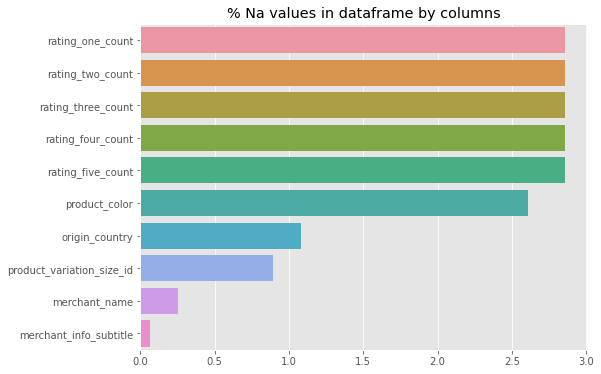

In [ ]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');
    
plot_missing_data(df)

### rating columns

Now let's process the columns with ratings, all the rating count columns has same number of values missing i.e. 45 missing values but the rating_count column has no na values, lets check the ratin_count where values are mising in other rating count columns

In [ ]:
rating_columns = ['rating_one_count','rating_two_count','rating_three_count','rating_four_count','rating_five_count']
df[rating_columns] = df[rating_columns].fillna(value=-1)

In [ ]:
df.loc[df['rating_five_count']==-1,'rating_count'].value_counts()

0    45
Name: rating_count, dtype: int64

all values in the rating_count column are 0 where there are na values in other rating count columns so lets fill 0 in place of the na values

In [ ]:
df[rating_columns]=df[rating_columns].replace(-1,0)

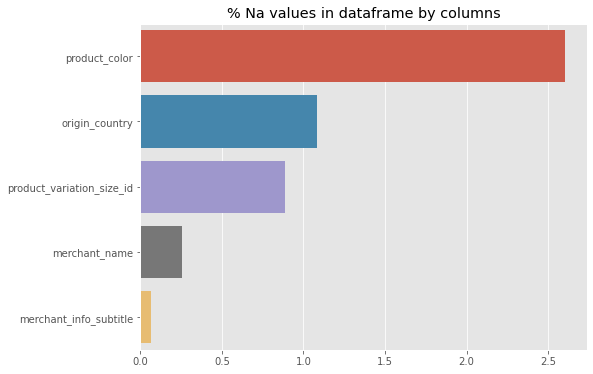

In [ ]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');
    
plot_missing_data(df)

In [ ]:
# Let's move to the remaining column

#### Product Color

Looking at the unique values, there are over 100 categories.
I've manually grouped each value into their respective general colors except pink (a shade of red), it has enough products to be it's own group.

In [ ]:
print("Unique values: ", df['product_color'].unique())
print("Value counts:")
print(df['product_color'].value_counts())

Unique values:  ['white' 'green' 'leopardprint' 'black' 'yellow' 'navyblue' 'blue' 'beige'
 'grey' 'lightblue' 'orange' 'red' 'Black' 'armygreen' nan 'pink' 'khaki'
 'red & blue' 'blue & pink' 'RED' 'white & green' 'winered'
 'black & green' 'purple' 'whitefloral' 'floral' 'fluorescentgreen'
 'orange & camouflage' 'lightyellow' 'coolblack' 'multicolor' 'camouflage'
 'lightpink' 'pink & black' 'silver' 'Army green' 'lightgreen' 'mintgreen'
 'pink & grey' 'gray' 'coffee' 'rose' 'light green' 'leopard'
 'black & white' 'orange-red' 'dustypink' 'White' 'star' 'white & black'
 'apricot' 'skyblue' 'burgundy' 'claret' 'pink & white' 'rosered' 'tan'
 'navy blue' 'wine red' 'lightred' 'Pink' 'coralred' 'brown' 'lakeblue'
 'darkblue' 'camel' 'pink & blue' 'nude' 'Blue' 'lightpurple' 'army'
 'black & stripe' 'Rose red' 'greysnakeskinprint' 'denimblue' 'applegreen'
 'offwhite' 'lightgray' 'navy' 'gray & white' 'brown & yellow'
 'winered & yellow' 'army green' 'whitestripe' 'rainbow' 'lightgrey'
 '

In [ ]:
color_map = {'leopardprint' : 'pattern', 'navyblue' : 'blue', 'beige' : 'brown', 'lightblue' : 'blue',
             'armygreen' : 'green', np.nan : 'unknown', 'khaki' : 'brown', 'red&blue' : 'twocolor', 
             'blue&pink' : 'twocolor', 'white&green' : 'twocolor', 'winered' : 'red', 'black&green' : 'twocolor',
             'whitefloral' : 'pattern', 'floral' : 'pattern', 'fluorescentgreen' : 'green','orange&camouflage' : 'pattern',
             'lightyellow' : 'yellow', 'coolblack' : 'black', 'multicolor' : 'pattern', 'camouflage' : 'pattern', 
             'lightpink' : 'pink', 'pink&black' : 'twocolor', 'silver' : 'grey', 'lightgreen' : 'green', 
             'mintgreen' : 'green', 'pink&grey' : 'twocolor', 'gray' : 'grey', 'coffee' :'brown', 'rose' : 'red',
             'leopard' : 'pattern', 'black&white' : 'twocolor', 'orange-red' : 'orange', 'dustypink' : 'pink', 
             'star' : 'pattern', 'white&black' : 'twocolor', 'apricot' : 'orange', 'skyblue' : 'blue', 
             'burgundy' : 'red', 'claret' : 'red', 'pink&white' : 'twocolor', 'rosered' : 'red', 'lightred' : 'red', 
             'coralred' : 'red', 'lakeblue' : 'blue', 'darkblue' : 'blue', 'camel' : 'brown','pink&blue' : 'twocolor',
             'nude' : 'brown', 'lightpurple' : 'purple', 'army' : 'pattern', 'black&stripe' : 'twocolor',
             'greysnakeskinprint' : 'pattern', 'denimblue' :  'blue', 'applegreen' : 'green', 'offwhite' : 'white',
             'lightgray' : 'grey', 'navy' : 'blue', 'gray&white' : 'twocolor', 'brown&yellow' : 'twocolor',
             'winered&yellow' : 'twocolor', 'whitestripe' : 'white', 'rainbow' : 'pattern', 'lightgrey' : 'grey',
             'watermelonred' : 'red', 'prussianblue' : 'blue', 'navyblue&white' : 'twocolor', 'white&red' : 'twocolor',
             'wine' : 'red', 'ivory' : 'white', 'black&yellow' : 'twocolor', 'jasper' : 'green', 'lightkhaki' : 'brown',
             'offblack' : 'black', 'violet' : 'purple', 'black&blue' : 'twocolor', 'blackwhite' : 'twocolor', 
             'rosegold' : 'pink', 'gold' : 'yellow'}

df['product_color'] = df['product_color'].str.lower()
df['product_color'] = df['product_color'].str.replace(' ', '')

df['product_color'] = df['product_color'].replace(color_map)

print("Unique values: ", df['product_color'].unique())
print("Value counts:")
print(df['product_color'].value_counts())

Unique values:  ['white' 'green' 'pattern' 'black' 'yellow' 'blue' 'brown' 'grey' 'orange'
 'red' 'unknown' 'pink' 'twocolor' 'purple' 'tan' 'darkgreen']
Value counts:
black        308
white        260
blue         164
red          148
green        137
pink         108
yellow       108
grey          86
purple        55
brown         44
unknown       41
twocolor      40
pattern       40
orange        32
tan            1
darkgreen      1
Name: product_color, dtype: int64


In [ ]:
def color(col):
    ls = ['black', 'white', 'blue', 'red', 'green', 'yellow', 'pink', 'grey', 'purple', 'orange', 'brown', 'beige']
    if col not in ls:
        if '&' in col:
            return 'dual'
        else:
            return 'others'
    return col

In [ ]:
df['product_color'] = df['product_color'].apply(color)

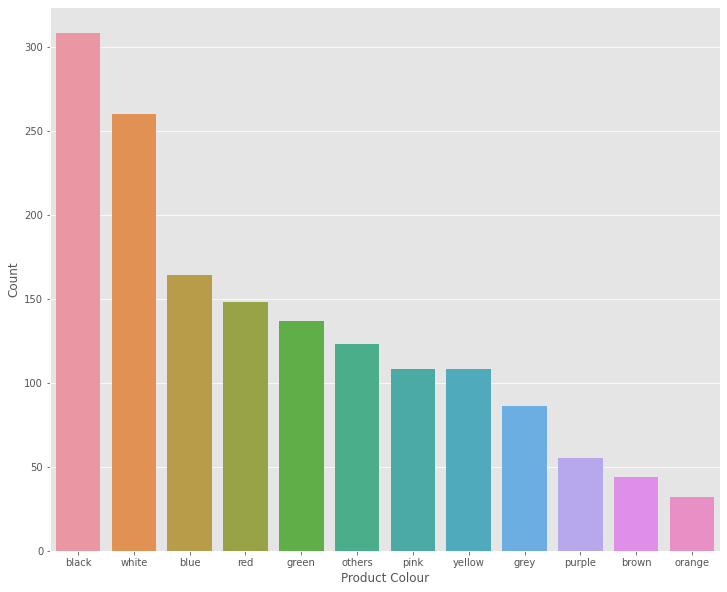

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x = 'product_color', data = df, order = df['product_color'].value_counts().iloc[:].index)
plt.xlabel('Product Colour')
plt.ylabel('Count')
plt.show()

#### product_variation_size_id

In [ ]:
print("Unique values: ", df['product_variation_size_id'].unique())
print("Value counts:")
print(df['product_variation_size_id'].value_counts())

Unique values:  ['M' 'XS' 'S' 'Size-XS' 'M.' 'XXS' 'L' 'XXL' nan 'S.' 's' 'choose a size'
 'XS.' '32/L' 'Suit-S' 'XXXXXL' 'EU 35' '4' 'Size S.' '1m by 3m' '3XL'
 'Size S' 'XL' 'Women Size 36' 'US 6.5 (EU 37)' 'XXXS' 'SIZE XS'
 '26(Waist 72cm 28inch)' 'Size XXS' '29' '1pc' '100 cm' 'One Size'
 'SIZE-4XL' '1' 'S/M(child)' '2pcs' 'XXXL' 'S..' '30 cm' '5XL' '33'
 'Size M' '100 x 100cm(39.3 x 39.3inch)' '100pcs' '2XL' '4XL' 'SizeL'
 'SIZE XXS' 'XXXXL' 'Base & Top & Matte Top Coat' 'size S' '35' '34'
 'SIZE-XXS' 'S(bust 88cm)' 'S (waist58-62cm)' 'S(Pink & Black)' '20pcs'
 'US-S' 'Size -XXS' 'X   L' 'White' '25' 'Size-S' 'Round' 'Pack of 1'
 '1 pc.' 'S Diameter 30cm' '6XL' 'AU plug Low quality' '5PAIRS' '25-S'
 'Size/S' 'S Pink' 'Size-5XL' 'daughter 24M' '2' 'Baby Float Boat' '10 ml'
 '60' 'Size-L' 'US5.5-EU35' '10pcs' '17' 'Size-XXS' 'Women Size 37'
 '3 layered anklet' '4-5 Years' 'Size4XL' 'first  generation'
 '80 X 200 CM' 'EU39(US8)' 'L.' 'Base Coat' '36' '04-3XL' 'pants-S'
 'Floating Cha

In [ ]:
size_map = {'Size-XS' : 'XS', 'M.' : 'M', np.nan : 'unknown', 'S.' : 'S', 's' : 'S', 'choose a size' : 'unknown',
            'XS.' : 'XS', '32/L' : 'L', 'Suit-S' : 'S', 'XXXXXL' : '5XL', 'EU 35' : 'unknown',  '4' : 'XS', 'Size S.' : 'S',
            '1m by 3m' : 'unknown', 'Size S' : 'S', 'Women Size 36' : 'unknown', 
            'US 6.5 (EU 37)' : 'unknown', 'XXXS' : '3XS', 'SIZE XS' : 'XS', '26(Waist 72cm 28inch)' : 'unknown',
            'Size XXS' : 'XXS', '29' : 'unknown', '1pc' : 'unit', '100 cm' : 'unknown', 'One Size' : 'unknown',
            'SIZE-4XL' : '4XL', '1' : 'unknown', 'S/M(child)' : 'unknown', '2pcs' : 'unit', 'XXXL' : '3XL', 
            'S..' : 'S', '30 cm' : 'unknown', '33' : 'unknown', 'Size M' : 'M', '100 x 100cm(39.3 x 39.3inch)' : 'unknown',
            '100pcs' : 'unit', '2XL' : 'XXL', 'SIZE XXS' : 'XXS', 'Base & Top & Matte Top Coat' : 'unknown', 
            'size S' : 'S', '35' : 'unknown', '34' : 'unknown', 'SIZE-XXS' : 'XXS', 'S(bust 88cm)' : 'S', 
            'S (waist58-62cm)' : 'S', 'S(Pink & Black)' : 'S', '20pcs' : 'unit', 'US-S' : 'S', 'Size -XXS' : 'XXS', 
            'X   L' : 'XL', 'XXXXL' : '4XL', '25' : 'unknown', 'SizeL' : 'L', 'Size-S' : 'S', 'Round' : 'unknown', 
            'Pack of 1' : 'unit', 'S Diameter 30cm' : 'unknown', 'AU plug Low quality' : 'unknown', '5PAIRS' : 'unit', 
            '25-S' : 'S', 'Size/S' : 'S', 'S Pink' : 'S', 'Size-5XL' : '5XL', 'daughter 24M' : 'M', '2' : 'unknown',
            'Baby Float Boat' : 'unknown', '10 ml' : 'unknown', '60' : 'unknown', 'Size-L' : 'L', 'US5.5-EU35' : 'unknown',
            '10pcs' : 'unit', '17' : 'unknown', 'Size-XXS' : 'XXS', 'Women Size 37' : 'unknown', 
            '3 layered anklet' : 'unknown', '4-5 Years' : 'unknown', 'Size4XL' : '4XL', 'first  generation' : 'unknown',
            '80 X 200 CM' : 'unknown', 'EU39(US8)' : 'unknown', 'L.' : 'L', 'Base Coat' : 'unknown', '36' : 'unknown',
            '04-3XL' : '3XL', 'pants-S' : 'S', 'Floating Chair for Kid' : 'unknown', '20PCS-10PAIRS' : 'unknown', 
            'B' : 'unknown', 'Size--S' : 'S', '5' : 'unknown', '1 PC - XL' : 'XL', 'H01' : 'unknown', '40 cm' : 'unknown',
            'SIZE S' : 'S'}

df['product_variation_size_id'] = df['product_variation_size_id'].replace(size_map)

print("Unique values: ", df['product_variation_size_id'].unique())
print("Value counts:")
print(df['product_variation_size_id'].value_counts())

Unique values:  ['M' 'XS' 'S' 'XXS' 'L' 'XXL' 'unknown' '5XL' '3XL' 'XL' '3XS' 'unit'
 '4XL' 'White' '1 pc.' '6XL']
Value counts:
S          691
XS         370
M          207
XXS        107
unknown     67
L           55
XL          19
XXL         19
4XL         10
unit         9
3XS          6
5XL          5
3XL          4
1 pc.        2
White        1
6XL          1
Name: product_variation_size_id, dtype: int64


In [ ]:
def size_name(size):
    ls = ["XXXS", "XXS", "XS", "S", "M", "L", "XL", "XXL", "XXXL", "XXXXL", "XXXXXL"]
    if size in ls:
        return size
    return "Others"

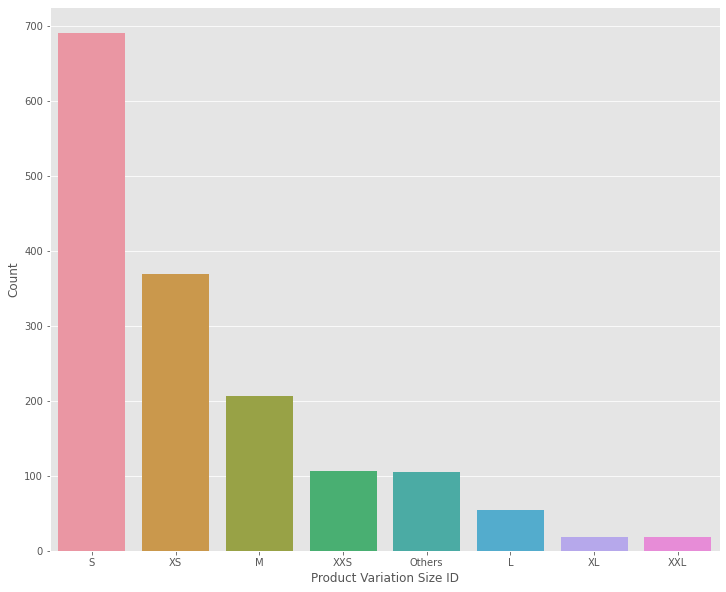

In [ ]:
df['product_variation_size_id'].replace(np.nan, 'Others', inplace=True)
df['product_variation_size_id'] = df['product_variation_size_id'].apply(size_name)

plt.figure(figsize=(12,10))
sns.countplot(x = 'product_variation_size_id', data = df, order = df['product_variation_size_id'].value_counts().iloc[:].index)
plt.xlabel('Product Variation Size ID')
plt.ylabel('Count')
plt.show()

In [ ]:
df['origin_country'].value_counts()

CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [ ]:
def origin_name(country):
    ls = ["VE", "SG", "GB", "AT"]
    if country in ls:
        return "Others"
    return country

In [ ]:
df['origin_country'].replace(np.nan, "Others", inplace=True)
df['origin_country'] = df['origin_country'].apply(origin_name)

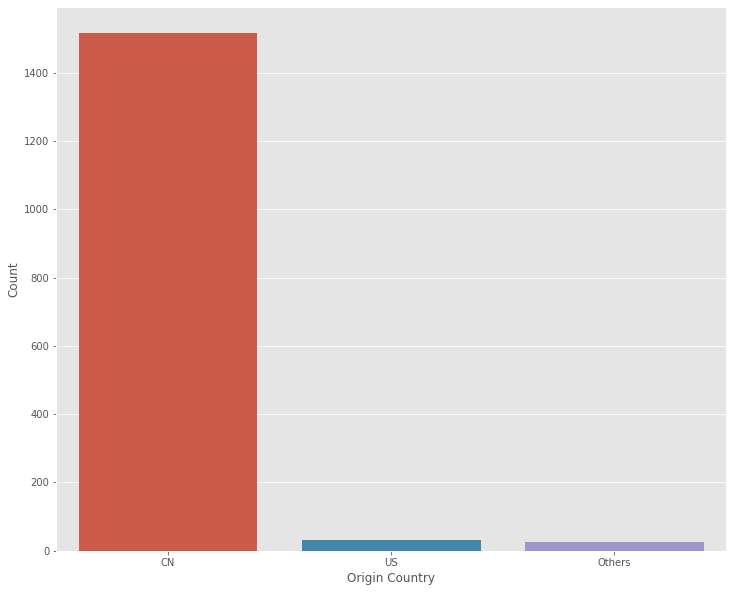

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x = 'origin_country', data = df, order = df['origin_country'].value_counts().iloc[:].index)
plt.xlabel('Origin Country')
plt.ylabel('Count')
plt.show()

In [ ]:
df.origin_country.value_counts(normalize=True)

CN        0.963764
US        0.019708
Others    0.016529
Name: origin_country, dtype: float64

In [ ]:
# Over 96% of the products originate from China. With this overwelming majority, this parameter can be purged.

In [ ]:
df = df.drop(columns=['origin_country'])

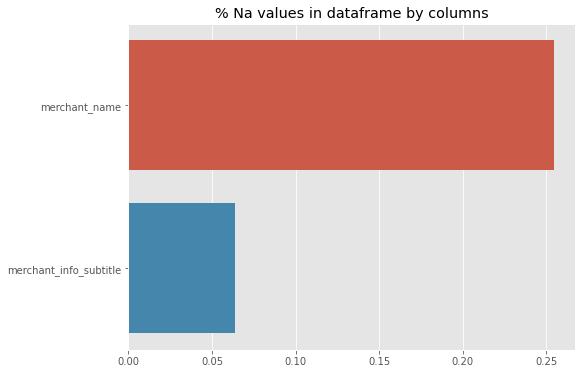

In [ ]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');
    
plot_missing_data(df)

In [ ]:
df.isnull().sum()

title_in_french                 0
title_translated                0
listed_price                    0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
urgency_text                    0
merchant_title

#### Drop Excess Information

Let's determine information that isn't informative.

In [ ]:
# Over 95% of the products are shipped using 'Livraison standard' shipping.
# With this overwelming majority, this parameter can be purged.

df.shipping_option_name.value_counts(normalize=True)

Livraison standard         0.958678
Standard Shipping          0.013350
Envio Padrão               0.005722
Expediere Standard         0.003814
Envío normal               0.003179
الشحن القياسي              0.002543
Standardversand            0.001907
Стандартная доставка       0.001907
Standardowa wysyłka        0.001907
Livraison Express          0.001907
Standart Gönderi           0.001271
การส่งสินค้ามาตรฐาน        0.001271
Spedizione standard        0.001271
ការដឹកជញ្ជូនតាមស្តង់ដារ    0.000636
Ekspresowa wysyłka         0.000636
Name: shipping_option_name, dtype: float64

In [ ]:
df = df.drop(columns=['shipping_option_name'])

In [ ]:
# Over 99% of the products possess an inventory of fifty (or greater)! With this overwelming majority, this parameter can be purged.

df.inventory_total.value_counts(normalize=True)

50    0.993643
2     0.001271
40    0.000636
38    0.000636
37    0.000636
36    0.000636
30    0.000636
24    0.000636
9     0.000636
1     0.000636
Name: inventory_total, dtype: float64

In [ ]:
df = df.drop(columns=['inventory_total'])

In [ ]:
# Over 89% of the products have zero badges and a bit over 9% have one badge. With this overwelming majority, this parameter can be purged.

In [ ]:
df.badges_count.value_counts(normalize=True)

0    0.904005
1    0.087730
2    0.006993
3    0.001271
Name: badges_count, dtype: float64

In [ ]:
df = df.drop(columns=['badges_count'])

In [ ]:
# Over 97% of the products don't possess the local product badge. With this overwelming majority, this parameter can be purged.

df.badge_local_product.value_counts(normalize=True)

0    0.981564
1    0.018436
Name: badge_local_product, dtype: float64

In [ ]:
df = df.drop(columns=['badge_local_product'])

In [ ]:
# Over 98% of the products don't possess the fast-shipping badge. With this overwelming majority, this parameter can be purged.

In [ ]:
df.badge_fast_shipping.value_counts(normalize=True)

0    0.987285
1    0.012715
Name: badge_fast_shipping, dtype: float64

In [ ]:
df = df.drop(columns=['badge_fast_shipping'])

In [ ]:
# Over 99% of the products don't possess express shipping. With this overwelming majority, this parameter can be purged.



In [ ]:
df.shipping_is_express.value_counts(normalize=True)

0    0.997457
1    0.002543
Name: shipping_is_express, dtype: float64

In [ ]:
df = df.drop(columns=['shipping_is_express'])

There are a few other parameters I'd like to purge:

* `title_in_french` - Provides product title in French.
* `currency_buyer` - There is only one currency: `EUR`.
* `merchant_title` - `merchant_id` will be used as merchant identifier.
* `merchant_name` - `merchant_id` will be used as merchant identifier.
* `merchant_info_subtitle` - Provides merchant rating as convoluted String.
* `merchant_has_profile_picture` - Not sure how to utilize.
* `merchant_profile_picture` - Not sure how to utilize.
* `product_url` - Doesn't seem necessary.
* `theme` - There is only one unique value: `summer`.
* `crawl_month` - There is only one unique value: `2020-08`.

In [ ]:
df = df.drop(columns = ['title_in_french', 'currency_buyer', 'merchant_title', 'merchant_name', 
                        'merchant_info_subtitle', 'merchant_has_profile_picture', 
                         'product_url', 'theme', 
                        'crawl_month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title_translated             1573 non-null   object 
 1   listed_price                 1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   units_sold                   1573 non-null   int64  
 4   uses_ad_boosts               1573 non-null   int64  
 5   rating                       1573 non-null   float64
 6   rating_count                 1573 non-null   int64  
 7   rating_five_count            1573 non-null   float64
 8   rating_four_count            1573 non-null   float64
 9   rating_three_count           1573 non-null   float64
 10  rating_two_count             1573 non-null   float64
 11  rating_one_count             1573 non-null   float64
 12  badge_product_quality        1573 non-null   int64  
 13  tags              

In [ ]:
df['has_urgency_banner'] = df['has_urgency_banner'].astype(int)

In [ ]:
df.head(3)

,title_translated,listed_price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_product_quality,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,has_urgency_banner,urgency_text,merchant_rating_count,merchant_rating,merchant_id,product_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,4,34,1,QuantityLimited,568,4.128521,595097d6a26f6e070cb878d1,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,2,41,1,QuantityLimited,17752,3.899673,56458aa03a698c35c9050988,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.0,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",others,XS,1,3,36,1,QuantityLimited,295,3.989831,5d464a1ffdf7bc44ee933c65,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a


#### Tags

There are over 2600 unique tags, so it won't be possible to correct them, even manually.
Instead, what we'll do is `split()` the String and then apply `lower()` to each tag for consistency.

Now the tags are standardized, somewhat...

In [ ]:
print(df['tags'].head(5))

0    Summer,Fashion,womenunderwearsuit,printedpajam...
1    Mini,womens dresses,Summer,Patchwork,fashion d...
2    Summer,cardigan,women beachwear,chiffon,Sexy w...
3    Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4    Summer,Plus Size,Lace,Casual pants,Bottom,pant...
Name: tags, dtype: object


In [ ]:
df['tags'] = df['tags'].apply(lambda tag: tuple(val.lower() for val in tag.split(',')))

print(df['tags'].head(5))

0    (summer, fashion, womenunderwearsuit, printedp...
1    (mini, womens dresses, summer, patchwork, fash...
2    (summer, cardigan, women beachwear, chiffon, s...
3    (summer, shorts, cotton, cotton t shirt, sleev...
4    (summer, plus size, lace, casual pants, bottom...
Name: tags, dtype: object


#### Duplicates



In [ ]:
print("There were %d duplicate rows." % (df.duplicated().sum()))

df = df.drop_duplicates()

There were 0 duplicate rows.


In [ ]:
duplicate_features = ['merchant_id', 'product_id']

print("There were %d rows with duplicate %s features." % (df.duplicated(subset=duplicate_features).sum(), tuple(duplicate_features)))
df[duplicate_features].where(df.duplicated(subset=duplicate_features) == True).dropna(axis=0)

There were 198 rows with duplicate ('merchant_id', 'product_id') features.


,merchant_id,product_id
62,5ab3b592c3911a095ad5dadb,5ebf5819ebac372b070b0e70
91,53f6b7c81c105e2dfac91041,5d5d038d99df1e17cc9313cf
98,566eaa533a698c6442549a74,5d1db3c0e2b5cc0f74e091af
140,55e7e41e606d0a18fdfc67d1,5aec22cec25735338c544690
162,5e61c817039ce2184a0ed392,5e9a74e447f7d92c8db8d14b
...,...,...
1559,5b0b907d59206904541886cf,5ea0f2a654446407c111b622
1562,56458aa03a698c35c9050988,5d58daef3159a812b05933d2
1566,593402ae25c4f54ed4e0abdf,5d1060d39ed281190dfcec91
1569,54d83b6b6b8a771e478558de,5eccd22b4497b86fd48f16b4


In [ ]:
df = df.drop_duplicates(subset=duplicate_features)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title_translated             1341 non-null   object 
 1   listed_price                 1341 non-null   float64
 2   retail_price                 1341 non-null   int64  
 3   units_sold                   1341 non-null   int64  
 4   uses_ad_boosts               1341 non-null   int64  
 5   rating                       1341 non-null   float64
 6   rating_count                 1341 non-null   int64  
 7   rating_five_count            1341 non-null   float64
 8   rating_four_count            1341 non-null   float64
 9   rating_three_count           1341 non-null   float64
 10  rating_two_count             1341 non-null   float64
 11  rating_one_count             1341 non-null   float64
 12  badge_product_quality        1341 non-null   int64  
 13  tags              

In [ ]:
df.to_csv(r'CleanDF.csv', index = False)